In [4]:
import pandas as pd
import os
from datetime import datetime
import numpy as np

elems=['arsenic','boran','chloride','copper','molybdenum','sulfate','vanadium','fluoride']
data_path='./data/'
dfs={e:pd.read_csv(os.path.join(data_path,e+'.csv')) for e in elems}
for key,val in dfs.items(): dfs[key]=val.iloc[:np.where(val.iloc[:,0].isnull().values==True)[0][0],:]
dfs={key:val[val.columns & ['StateWellNumber','Date','LatitudeDD','LongitudeDD','ParameterValue']] for key,val in dfs.items()}
for key,val in dfs.items(): val['DateTime']=[datetime.strptime(d,'%m/%d/%Y') for d in val.Date]

C:\conda_tmp\ipykernel_26180\1698275357.py:10: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead.
  dfs={key:val[val.columns & ['StateWellNumber','Date','LatitudeDD','LongitudeDD','ParameterValue']] for key,val in dfs.items()}


In [5]:
import random
# elem=random.choice(elems)
elem='arsenic'
print('Data of %s'%elem)
dfs[elem].head()

Data of arsenic


,StateWellNumber,Date,LatitudeDD,LongitudeDD,ParameterValue,DateTime
0,5846410,9/3/1980,30.303056,-97.347778,0.0,1980-09-03
1,5846502,9/3/1980,30.328889,-97.309445,1.0,1980-09-03
2,5846515,9/3/1980,30.321667,-97.313889,0.0,1980-09-03
3,5854103,9/3/1980,30.249722,-97.346667,0.0,1980-09-03
4,5854302,9/3/1980,30.242778,-97.285556,0.0,1980-09-03


In [6]:
ref_key=list(dfs.keys())[0]
print('ref:',ref_key)
common_dates=dfs[ref_key].DateTime
print('len:',len(common_dates))
for key,val in dfs.items():
    if key==ref_key: continue
    print('key:',key)
    common_dates=np.intersect1d(common_dates,val.DateTime)
    print('len:',len(common_dates))
    # print(common_dates)

print(common_dates.shape)
print(common_dates)

ref: arsenic
len: 2548
key: boran
len: 568
key: chloride
len: 552
key: copper
len: 552
key: molybdenum
len: 537
key: sulfate
len: 536
key: vanadium
len: 536
key: fluoride
len: 384
(384,)
['2002-03-04T00:00:00.000000000' '2002-03-05T00:00:00.000000000'
 '2002-03-06T00:00:00.000000000' '2002-03-07T00:00:00.000000000'
 '2002-03-11T00:00:00.000000000' '2002-03-12T00:00:00.000000000'
 '2002-03-13T00:00:00.000000000' '2002-03-14T00:00:00.000000000'
 '2002-03-18T00:00:00.000000000' '2002-03-19T00:00:00.000000000'
 '2002-03-20T00:00:00.000000000' '2002-03-25T00:00:00.000000000'
 '2002-03-26T00:00:00.000000000' '2002-03-27T00:00:00.000000000'
 '2002-03-28T00:00:00.000000000' '2002-03-29T00:00:00.000000000'
 '2002-04-01T00:00:00.000000000' '2002-04-08T00:00:00.000000000'
 '2002-04-09T00:00:00.000000000' '2002-04-10T00:00:00.000000000'
 '2002-04-11T00:00:00.000000000' '2002-04-12T00:00:00.000000000'
 '2002-04-15T00:00:00.000000000' '2002-04-16T00:00:00.000000000'
 '2002-04-17T00:00:00.000000000' 

In [9]:
from collections import Counter
counter=Counter([str(d).split('-')[0] for d in common_dates])
print(counter)

Counter({'2002': 92, '2010': 66, '2006': 59, '2014': 56, '2018': 39, '2005': 23, '2009': 14, '2003': 10, '2011': 9, '2020': 7, '2004': 5, '2013': 1, '2016': 1, '2017': 1, '2019': 1})


In [21]:
dates_2002=[d for d in common_dates if str(d).split('-')[0]=='2002' and int(str(d).split('-')[1])<8]
num_days=int((dates_2002[-1]-dates_2002[0]).astype('timedelta64[D]')/np.timedelta64(1,'D'))+1

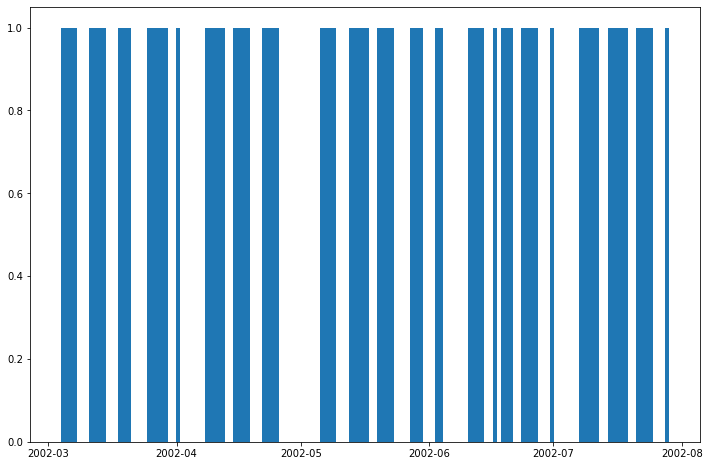

In [22]:
import matplotlib.pyplot as plt
dates_2002=sorted(dates_2002)

plt.figure(figsize=(12,8))
plt.hist(dates_2002,bins=num_days)
plt.show()